In [2]:
from my_packages import *
from appgeopy import *

In [4]:
fpath = r"1_MLCWs/20250314_MLCW_CRFP_monthly_v1.h5"
mlcw_obj = MLCW(h5_fpath=fpath)
mlcw_data, mlcw_metadata = mlcw_obj.get_data()
available_stations = mlcw_obj.list_stations()
available_stations[:5]

['ANHE', 'BEICHEN', 'CANLIN', 'DONGGUANG', 'ERLUN']

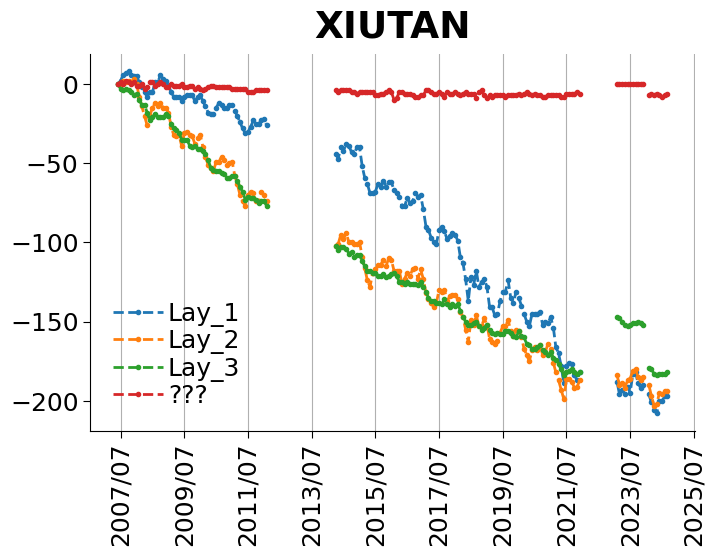

In [46]:
# select_station = available_stations[0]
select_station = "XIUTAN"

byte_decode = lambda x: x.decode("utf-8")
monthly_dates_arr = pd.to_datetime([byte_decode(x) for x in mlcw_data[select_station]["monthly_date"]])
monthly_values_arr =  mlcw_data[select_station]["monthly_values"]["compactbylayer"]

df = pd.DataFrame(data=monthly_values_arr, columns=monthly_dates_arr)
df = df.T
df.columns = ["Lay_1", "Lay_2", "Lay_3", "???"]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11.7*2/3, 8.3*2/3))

for col in df.columns:
    visualize.base_plot(data=df[col], ax=ax, label=col, lw=2, marker='o', linestyle='--', ms=3)
visualize.configure_axis(ax, tick_direction='out', title=select_station, hide_spines=["top", "right"])
visualize.configure_legend(ax=ax)
visualize.configure_ticks(ax=ax)
visualize.configure_datetime_ticks(ax=ax, major_interval=24)
fig.autofmt_xdate(ha='center', rotation=90)
visualize.save_figure(fig=fig, savepath=f"{select_station}_sample.png")